# Weather Linear Regression
A sample notebook for using Lathe.models: LinearRegression in Lathe 0.0.9

In [1]:
# Unfortunately, in order to read a CSV file, we'll need to use
using CSV

[data is here](https://medium.com/r/?url=https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F634%2F1203%2Fbundle%2Farchive.zip%3FGoogleAccessId%3Dweb-data%40kaggle-161607.iam.gserviceaccount.com%26Expires%3D1580539189%26Signature%3DIeEyF6qXl1ZFeB76YQ7VrdiZMAHxcR6vozK6yr48oo2s9iCq2QJVDW14gat8e2VA0w%252B7CQpKP2mpm%252BKdHe7AyriV5%252FCRBybNBJ%252BfByrArwMR5fHTQJE17GUr1n97EXtEFiQq5%252FKAtDcqJsh%252BvbVTXVowaJKsF8VhcdwYKRkXg9T4Bk2Jle%252FPEmsn4rxA9CDRItR%252B%252FdDvHADUHgVnaZpmWcwbnMYya3jPS2v%252FGdBQiX2GI4118bxVDEQ8BRvfwcDxK2NFJspGnEYfSVDfchCWfYguSZAgFZ3xjA3Sf9MmGEVqxc%252F1yecBuWeNFhKiBRmJ1yLuQffISH9YedKImk6%252FUg%253D%253D%26response-content-disposition%3Dattachment%253B%2Bfilename%253Dszeged-weather.zip)

In [2]:
# Hopefully, you understand this
df = CSV.read("weatherHistory.csv")

96453×12 DataFrames.DataFrame. Omitted printing of 9 columns
│ Row   │ Formatted Date                │ Summary       │ Precip Type │
│       │ String                        │ String        │ String      │
├───────┼───────────────────────────────┼───────────────┼─────────────┤
│ 1     │ 2006-04-01 00:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 2     │ 2006-04-01 01:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 3     │ 2006-04-01 02:00:00.000 +0200 │ Mostly Cloudy │ rain        │
│ 4     │ 2006-04-01 03:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 5     │ 2006-04-01 04:00:00.000 +0200 │ Mostly Cloudy │ rain        │
│ 6     │ 2006-04-01 05:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 7     │ 2006-04-01 06:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 8     │ 2006-04-01 07:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 9     │ 2006-04-01 08:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 10    │ 2006-04-01 09:00:00.000 +0200 │ Partly Cloudy │ rain        │
⋮
│ 96443 │ 2016-09-09 13:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 96444 │ 2016-09-09 14:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 96445 │ 2016-09-09 15:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 96446 │ 2016-09-09 16:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 96447 │ 2016-09-09 17:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 96448 │ 2016-09-09 18:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 96449 │ 2016-09-09 19:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 96450 │ 2016-09-09 20:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 96451 │ 2016-09-09 21:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 96452 │ 2016-09-09 22:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 96453 │ 2016-09-09 23:00:00.000 +0200 │ Partly Cloudy │ rain        │

In [3]:
# Now this is a shitty part about DataFrames.jl....
show(df,allcols=true)

96453×12 DataFrames.DataFrame
│ Row   │ Formatted Date                │ Summary       │ Precip Type │
│       │ String                        │ String        │ String      │
├───────┼───────────────────────────────┼───────────────┼─────────────┤
│ 1     │ 2006-04-01 00:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 2     │ 2006-04-01 01:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 3     │ 2006-04-01 02:00:00.000 +0200 │ Mostly Cloudy │ rain        │
│ 4     │ 2006-04-01 03:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 5     │ 2006-04-01 04:00:00.000 +0200 │ Mostly Cloudy │ rain        │
│ 6     │ 2006-04-01 05:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 7     │ 2006-04-01 06:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 8     │ 2006-04-01 07:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 9     │ 2006-04-01 08:00:00.000 +0200 │ Partly Cloudy │ rain        │
│ 10    │ 2006-04-01 09:00:00.000 +0200 │ Partly Cloudy │ rain        │
⋮
│ 96443 │ 2016-09-09 13:00:00.00

In [4]:
# We need DataFrames in order to construct a new DataFrame
using DataFrames
# A symbol in Julia is an abstract type: it doesn't mean anything
# It can be given to anything, to pass a string as a symbol, we can use Symbol()
#   In this case, because of the column name's spaces, we use a string
#                                                          vvvvvv  vvvvvvvvvvvvvv
df = DataFrame(:Humidity => df[:Humidity],:WindSpeed => df[Symbol("Wind Speed (km/h)")])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[4]:3
└ @ Core In[4]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[4]:3
└ @ Core In[4]:3


96453×2 DataFrame
│ Row   │ Humidity │ WindSpeed │
│       │ Float64  │ Float64   │
├───────┼──────────┼───────────┤
│ 1     │ 0.89     │ 14.1197   │
│ 2     │ 0.86     │ 14.2646   │
│ 3     │ 0.89     │ 3.9284    │
│ 4     │ 0.83     │ 14.1036   │
│ 5     │ 0.83     │ 11.0446   │
│ 6     │ 0.85     │ 13.9587   │
│ 7     │ 0.95     │ 12.3648   │
│ 8     │ 0.89     │ 14.1519   │
│ 9     │ 0.82     │ 11.3183   │
│ 10    │ 0.72     │ 12.5258   │
⋮
│ 96443 │ 0.33     │ 15.617    │
│ 96444 │ 0.28     │ 14.7798   │
│ 96445 │ 0.28     │ 15.5043   │
│ 96446 │ 0.28     │ 13.8943   │
│ 96447 │ 0.28     │ 14.2163   │
│ 96448 │ 0.32     │ 12.2038   │
│ 96449 │ 0.43     │ 10.9963   │
│ 96450 │ 0.48     │ 10.0947   │
│ 96451 │ 0.56     │ 8.9838    │
│ 96452 │ 0.6      │ 10.5294   │
│ 96453 │ 0.61     │ 5.8765    │

In [5]:
# Notice we can access with the symbols
df[:Humidity]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[5]:1
└ @ Core In[5]:1


96453-element Array{Float64,1}:
 0.89
 0.86
 0.89
 0.83
 0.83
 0.85
 0.95
 0.89
 0.82
 0.72
 0.67
 0.54
 0.55
 ⋮   
 0.37
 0.33
 0.28
 0.28
 0.28
 0.28
 0.32
 0.43
 0.48
 0.56
 0.6 
 0.61

In [6]:
# Let's pretend I don't know anything, this is how you could use ?
using Lathe

In [7]:
?(Lathe)

search: Lathe relpath realpath splitpath LOAD_PATH



|====== Lathe - Easily ML =====

|= = = = = v. 0.0.9 = = = = = |

|==============================

|__________Lathe.stats

|__________Lathe.validate

|__________Lathe.preprocess

|__________Lathe.models

|______________________________

Use ?(Lathe.package) for information!

[uuid]

38d8eb38-e7b1-11e9-0012-376b6c802672

[deps]

DataFrames.jl

Random.jl

```

```


In [8]:
# Use ?(Lathe.package) for more info?
       #    GLADLY

In [9]:
?(Lathe.preprocess)

|====== Lathe.preprocess =====

|____________/ Generalized Processing ___________

|_____preprocess.TrainTestSplit(array)

|_____preprocess.ArraySplit(array)

|_____preprocess.SortSplit(array)

|_____preprocess.UniformSplit(array)

|____________/ Feature Scaling ___________

|_____preprocess.Rescalar(array)

|_____preprocess.ArbitraryRescale(array)

|_____preprocess.MeanNormalization(array)

|_____preprocess.StandardScalar(array)

|_____preprocess.UnitLScale(array)

|____________/ Categorical Encoding ___________

|_____preprocess.OneHotEncode(array)

|_____preprocess.InvertEncode(array)

```

```


In [10]:
# I see TrainTestSplit under generalized processing!

In [11]:
?(Lathe.preprocess.TrainTestSplit)

Train Test split is used to create a validation set to toy accuracy with. TrainTestSplit() takes a DataFrame and splits it at a certain percentage of the data.

---

df = DataFrame(:A => [1,2,3],:B => [4,5,6])

test,train = Lathe.preprocess.TrainTestSplit(df,at = 0.75)

---

PARAMETERS:

at:: Percentage value used to determine a point to split the data.


In [12]:
# This DF has no missing values, so we don't have to worry about that
using Lathe.preprocess: TrainTestSplit, StandardScalar

In [13]:
# In order to "Machine learn", we need to have a train set, and a corresponding set to validate our model.
#    For this, we use Lathe.preprocess.TrainTestSplit.
# The standard Scalar is a Z-Score normalizer that normalizes the data, I will use this after the initial fit,
#    So we can see if there's a jump in accuracy (there will be)
train, test = TrainTestSplit(df)
# ^^ This code will give us a test and train dataframe to work with.

(72294×2 DataFrame
│ Row   │ Humidity │ WindSpeed │
│       │ Float64  │ Float64   │
├───────┼──────────┼───────────┤
│ 1     │ 0.89     │ 14.1197   │
│ 2     │ 0.86     │ 14.2646   │
│ 3     │ 0.89     │ 3.9284    │
│ 4     │ 0.83     │ 11.0446   │
│ 5     │ 0.85     │ 13.9587   │
│ 6     │ 0.95     │ 12.3648   │
│ 7     │ 0.82     │ 11.3183   │
│ 8     │ 0.72     │ 12.5258   │
│ 9     │ 0.67     │ 17.5651   │
│ 10    │ 0.54     │ 19.7869   │
⋮
│ 72284 │ 0.59     │ 6.4239    │
│ 72285 │ 0.42     │ 12.0106   │
│ 72286 │ 0.37     │ 13.9265   │
│ 72287 │ 0.33     │ 15.617    │
│ 72288 │ 0.28     │ 14.7798   │
│ 72289 │ 0.28     │ 15.5043   │
│ 72290 │ 0.28     │ 13.8943   │
│ 72291 │ 0.32     │ 12.2038   │
│ 72292 │ 0.43     │ 10.9963   │
│ 72293 │ 0.56     │ 8.9838    │
│ 72294 │ 0.61     │ 5.8765    │, 24159×2 DataFrame
│ Row   │ Humidity │ WindSpeed │
│       │ Float64  │ Float64   │
├───────┼──────────┼───────────┤
│ 1     │ 0.83     │ 14.1036   │
│ 2     │ 0.89     │ 14.1519   │
│ 3

In [14]:
# So now, for example:
show(test[:Humidity])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[14]:1
└ @ Core In[14]:1


[0.83, 0.89, 0.63, 0.69, 0.76, 0.77, 0.66, 0.8, 0.46, 0.36, 0.43, 0.6, 0.81, 0.99, 0.96, 0.82, 0.93, 0.86, 0.71, 0.75, 0.76, 0.73, 0.82, 0.85, 0.88, 0.93, 0.92, 0.58, 0.56, 0.72, 0.84, 0.43, 0.52, 0.71, 0.86, 0.56, 0.57, 0.67, 0.73, 0.89, 0.57, 0.62, 0.55, 0.79, 0.96, 0.93, 0.62, 0.61, 0.75, 0.85, 0.82, 0.78, 0.71, 0.69, 0.69, 0.69, 0.93, 0.8, 0.79, 0.77, 0.53, 0.86, 0.95, 0.99, 0.99, 0.87, 0.95, 0.99, 0.96, 0.96, 0.96, 0.96, 0.94, 0.74, 0.76, 0.77, 0.88, 0.92, 0.99, 1.0, 0.88, 0.72, 0.64, 0.68, 0.62, 0.74, 0.91, 0.95, 0.96, 0.93, 0.68, 0.95, 0.95, 0.82, 0.47, 0.37, 0.4, 0.48, 0.8, 0.78, 0.67, 0.5, 0.47, 0.77, 0.59, 0.35, 0.67, 0.82, 0.86, 0.74, 0.67, 0.62, 0.82, 0.86, 0.84, 0.6, 0.54, 0.46, 0.43, 0.72, 0.65, 0.66, 0.71, 0.6, 0.51, 0.47, 0.52, 0.47, 0.45, 0.71, 0.74, 0.6, 0.68, 0.43, 0.38, 0.45, 0.47, 0.95, 0.95, 0.94, 0.78, 0.87, 0.91, 0.89, 0.92, 1.0, 0.7, 0.51, 0.57, 0.54, 0.74, 0.8, 0.91, 0.92, 0.99, 0.92, 0.92, 0.89, 0.86, 0.75, 0.76, 0.77, 0.85, 0.43, 0.68, 0.91, 0.93, 0.79, 0.52

 0.93, 0.89, 0.8, 0.77, 0.95, 0.92, 0.85, 0.71, 0.93, 0.99, 1.0, 0.92, 1.0, 1.0, 0.99, 0.96, 0.96, 0.96, 0.93, 1.0, 0.99, 1.0, 1.0, 0.96, 0.61, 0.74, 0.96, 0.99, 0.85, 0.86, 0.92, 0.93, 0.92, 0.85, 0.88, 0.57, 0.4, 0.43, 0.81, 0.75, 0.79, 0.77, 0.77, 0.87, 0.89, 0.76, 0.83, 0.83, 0.82, 0.77, 0.77, 0.76, 0.74, 0.64, 0.92, 0.92, 1.0, 0.66, 0.6, 0.87, 0.95, 0.99, 0.96, 0.68, 0.55, 0.73, 0.91, 0.93, 0.91, 0.73, 0.42, 0.77, 0.95, 0.99, 0.99, 0.84, 0.42, 0.81, 0.96, 0.96, 0.49, 0.76, 0.86, 0.52, 0.44, 0.47, 0.57, 0.71, 0.9, 0.65, 0.52, 0.43, 0.47, 0.63, 0.73, 0.86, 0.95, 1.0, 0.93, 0.62, 0.47, 0.45, 0.68, 0.89, 0.93, 0.96, 1.0, 0.96, 0.52, 0.83, 0.89, 0.83, 0.62, 0.51, 0.45, 0.51, 0.64, 0.69, 0.71, 0.5, 0.5, 0.83, 0.83, 0.82, 0.44, 0.68, 0.92, 0.45, 0.33, 0.65, 0.84, 0.9, 0.9, 0.68, 0.74, 0.79, 0.9, 0.84, 0.73, 0.79, 0.83, 0.83, 0.39, 0.85, 0.79, 0.76, 0.84, 0.34, 0.57, 0.75, 0.75, 0.81, 0.86, 0.92, 0.89, 0.83, 0.96, 0.93, 0.96, 0.93, 0.57, 0.45, 0.49, 0.7, 0.73, 0.86, 0.72, 0.9, 0.93, 0.95,

 0.38, 0.69, 0.75, 0.71, 0.57, 0.59, 0.61, 0.63, 0.38, 0.4, 0.66, 0.68, 0.53, 0.54, 0.29, 0.26, 0.26, 0.42, 0.48, 0.84, 0.54, 0.35, 0.33, 0.5, 0.9, 0.84, 0.77, 0.62, 0.51, 0.53, 0.68, 0.77, 0.82, 0.29, 0.28, 0.28, 0.29, 0.41, 0.81, 0.84, 0.64, 0.47, 0.42, 0.33, 0.36, 0.58, 0.74, 0.76, 0.84, 0.33, 0.34, 0.35, 0.34, 0.38, 0.84, 0.46, 0.43, 0.57, 0.69, 0.72, 0.65, 0.61, 0.64, 0.72, 0.88, 0.88, 0.89, 0.83, 0.74, 0.74, 0.65, 0.65, 0.58, 0.76, 0.74, 0.76, 0.76, 0.89, 0.9, 0.9, 0.92, 0.83, 0.84, 0.8, 0.77, 0.83, 0.83, 0.77, 0.72, 0.77, 0.77, 0.83, 0.89, 0.8, 0.77, 0.75, 0.77, 0.68, 0.72, 0.86, 0.89, 0.96, 0.93, 0.93, 0.94, 0.93, 0.89, 0.89, 0.89, 0.95, 0.89, 0.89, 0.89, 0.83, 0.89, 0.95, 0.89, 0.95, 0.89, 0.86, 0.82, 0.89, 0.89, 0.82, 0.89, 0.75, 0.75, 0.76, 0.82, 0.82, 0.69, 0.78, 0.79, 0.82, 0.82, 0.96, 0.86, 0.89, 0.95, 0.86, 0.88, 0.86, 0.8, 0.79, 0.8, 0.74, 0.76, 0.7, 0.73, 0.75, 0.92, 0.85, 0.85, 0.84, 0.81, 0.85, 0.84, 0.88, 0.92, 0.91, 0.92, 0.84, 0.84, 0.92, 0.88, 0.92, 0.85, 0.91, 0

69, 0.77, 0.76, 0.35, 0.95, 0.75, 0.74, 0.8, 0.93, 0.86, 0.75, 0.86, 0.89, 0.89, 0.95, 0.93, 0.66, 0.62, 0.57, 0.62, 0.8, 0.86, 0.89, 0.89, 0.87, 0.77, 0.66, 0.89, 0.83, 0.89, 0.81, 0.55, 0.47, 0.58, 0.73, 0.78, 0.83, 0.84, 0.87, 0.9, 0.62, 0.84, 0.85, 0.8, 0.83, 0.82, 0.8, 0.8, 0.77, 0.75, 0.9, 0.96, 0.42, 0.35, 0.35, 0.62, 0.73, 0.75, 0.86, 0.35, 0.41, 0.49, 0.83, 0.82, 0.7, 0.4, 0.49, 0.61, 0.89, 0.93, 0.44, 0.76, 0.78, 0.78, 0.68, 0.83, 0.58, 0.37, 0.25, 0.35, 0.47, 0.57, 0.57, 0.26, 0.29, 0.36, 0.66, 0.68, 0.64, 0.66, 0.37, 0.26, 0.56, 0.25, 0.19, 0.59, 0.88, 0.79, 0.78, 0.69, 0.9, 0.89, 0.87, 0.93, 0.78, 0.39, 0.78, 0.77, 0.77, 0.78, 0.71, 0.69, 0.57, 0.64, 0.68, 0.79, 0.37, 0.24, 0.28, 0.35, 0.31, 0.56, 0.55, 0.69, 0.71, 0.78, 0.52, 0.52, 0.34, 0.46, 0.64, 0.67, 0.47, 0.41, 0.34, 0.51, 0.55, 0.57, 0.68, 0.76, 0.59, 0.31, 0.87, 0.77, 0.59, 0.51, 0.79, 0.89, 0.86, 0.86, 0.93, 0.52, 0.47, 0.38, 0.53, 0.68, 0.66, 0.4, 0.32, 0.46, 0.61, 0.89, 0.47, 0.7, 0.74, 0.86, 0.89, 0.77, 1.0, 1

 0.26, 0.44, 0.51, 0.41, 0.38, 0.36, 0.29, 0.65, 0.67, 0.7, 0.7, 0.75, 0.78, 0.78, 0.44, 0.32, 0.27, 0.26, 0.28, 0.46, 0.53, 0.8, 0.86, 0.82, 0.55, 0.48, 0.64, 0.9, 0.42, 0.62, 0.61, 0.87, 0.87, 0.64, 0.57, 0.5, 0.73, 0.73, 0.53, 0.39, 0.4, 0.48, 0.5, 0.55, 0.63, 0.73, 0.84, 0.9, 0.73, 0.68, 0.58, 0.84, 0.9, 0.85, 0.77, 0.63, 0.64, 0.5, 0.63, 0.7, 0.8, 0.8, 0.89, 0.8, 0.81, 0.81, 0.69, 0.74, 0.31, 0.29, 0.72, 0.77, 0.83, 0.86, 0.89, 0.32, 0.3, 0.63, 0.71, 0.86, 0.8, 0.32, 0.25, 0.26, 0.57, 0.67, 0.75, 0.83, 0.74, 0.65, 0.57, 0.55, 0.65, 0.44, 0.64, 0.96, 0.67, 0.56, 0.47, 0.39, 0.53, 0.72, 0.72, 0.49, 0.33, 0.46, 0.86, 0.61, 0.38, 0.36, 0.46, 0.58, 0.87, 0.87, 0.72, 0.29, 0.33, 0.32, 0.71, 0.69, 0.67, 0.81, 0.73, 0.74, 0.64, 0.47, 0.57, 0.84, 0.81, 0.78, 0.9, 0.9, 0.81, 0.69, 0.72, 0.83, 0.58, 0.46, 0.74, 0.74, 0.44, 0.46, 0.54, 0.62, 0.77, 0.38, 0.38, 0.44, 0.48, 0.52, 0.58, 0.65, 0.45, 0.3, 0.65, 0.86, 0.8, 0.39, 0.32, 0.34, 0.54, 0.8, 0.89, 0.61, 0.57, 0.75, 0.76, 0.5, 0.52, 0.81, 0

89, 0.93, 0.78, 0.64, 0.39, 0.36, 0.52, 0.65, 0.71, 0.82, 0.51, 0.37, 0.4, 0.74, 0.8, 0.86, 0.83, 0.83, 0.57, 0.59, 0.42, 0.73, 0.48, 0.34, 0.41, 0.63, 0.64, 0.82, 0.74, 0.72, 0.63, 0.83, 0.82, 0.67, 0.81, 0.71, 0.51, 0.56, 0.85, 0.7, 0.71, 0.64, 0.47, 0.66, 0.74, 0.66, 0.47, 0.4, 0.38, 0.33, 0.29, 0.75, 0.75, 0.64, 0.88, 0.92, 0.89, 0.73, 0.82, 0.54, 0.61, 0.72, 0.73, 0.75, 0.8, 0.56, 0.68, 0.67, 0.85, 0.83, 0.46, 0.34, 1.0, 0.81, 0.73, 0.67, 0.69, 0.8, 0.96, 0.93, 0.96, 0.53, 0.58, 0.76, 0.77, 0.96, 0.93, 0.66, 0.67, 0.81, 0.68, 0.96, 0.93, 0.96, 0.93, 0.84, 0.6, 0.93, 0.92, 0.78, 0.78, 0.79, 0.79, 0.94, 0.9, 0.84, 0.84, 1.0, 0.94, 0.93, 0.93, 0.93, 0.93, 0.93, 0.89, 0.89, 0.93, 0.86, 0.78, 0.77, 0.83, 0.77, 0.81, 0.86, 0.67, 0.74, 0.74, 0.73, 0.72, 0.8, 0.77, 0.8, 0.83, 0.83, 0.72, 0.88, 0.91, 0.78, 0.66, 0.83, 0.54, 0.56, 0.62, 0.98, 0.89, 0.87, 0.82, 0.77, 0.78, 0.96, 0.64, 0.6, 0.86, 0.96, 0.93, 0.96, 0.96, 0.93, 0.62, 0.39, 0.9, 0.87, 0.93, 0.93, 0.73, 0.77, 0.82, 0.96, 0.51, 0.

 0.93, 0.77, 0.32, 0.35, 0.64, 0.61, 0.59, 0.32, 0.34, 0.3, 0.68, 0.65, 0.74, 0.46, 0.46, 0.5, 0.31, 0.77, 0.87, 0.83, 0.93, 0.93, 0.59, 0.37, 0.34, 0.32, 0.84, 0.91, 0.64, 0.49, 0.42, 0.59, 0.87, 0.92, 0.87, 0.61, 0.44, 0.35, 0.86, 0.89, 0.78, 0.72, 0.85, 0.75, 0.92, 0.71, 0.8, 0.87, 0.75, 0.9, 0.88, 0.9, 0.87, 0.87, 0.85, 0.93, 0.78, 0.75, 0.87, 0.89, 0.78, 0.74, 0.65, 0.64, 0.47, 0.54, 0.96, 0.97, 0.93, 0.55, 0.62, 0.97, 1.0, 0.97, 1.0, 1.0, 0.74, 0.55, 0.61, 0.92, 0.97, 0.99, 0.85, 0.79, 0.93, 0.81, 0.77, 0.74, 0.68, 0.64, 1.0, 0.91, 0.69, 0.71, 0.5, 0.62, 0.93, 0.9, 0.8, 0.51, 0.67, 0.7, 0.82, 0.97, 0.93, 0.99, 0.95, 0.39, 0.46, 0.44, 0.48, 0.67, 1.0, 0.92, 0.49, 0.5, 0.76, 0.81, 0.89, 0.95, 0.78, 0.73, 0.8, 0.63, 0.56, 0.57, 0.9, 0.92, 0.96, 0.8, 0.65, 0.45, 0.39, 0.74, 0.92, 0.96, 0.59, 0.39, 0.39, 0.85, 0.92, 0.74, 0.61, 0.38, 0.32, 0.59, 0.81, 0.84, 0.87, 0.4, 0.35, 0.37, 0.72, 0.9, 0.93, 0.33, 0.92, 0.62, 0.47, 0.65, 0.73, 0.82, 0.78, 0.8, 0.74, 0.58, 0.59, 0.77, 0.73, 0.8, 0

 0.4, 0.71, 0.77, 0.74, 0.44, 0.38, 0.56, 0.6, 0.68, 0.67, 0.49, 0.63, 0.77, 0.83, 0.91, 0.89, 0.64, 0.58, 0.86, 0.93, 0.93, 0.89, 0.65, 0.69, 0.6, 0.43, 0.59, 0.59, 0.78, 0.72, 0.67, 0.45, 0.53, 0.79, 0.67, 0.4, 0.33, 0.31, 0.35, 0.42, 0.61, 0.32, 0.28, 0.28, 0.36, 0.4, 0.67, 0.72, 0.39, 0.4, 0.71, 0.86, 0.89, 0.49, 0.38, 0.39, 0.66, 0.87, 0.9, 0.93, 0.46, 0.64, 0.71, 0.72, 0.26, 0.88, 0.54, 0.38, 0.29, 0.25, 0.22, 0.66, 0.63, 0.42, 0.25, 0.31, 0.69, 0.69, 0.74, 0.68, 0.41, 0.35, 0.29, 0.32, 0.37, 0.44, 0.67, 0.71, 0.72, 0.61, 0.53, 0.47, 0.4, 0.61, 0.68, 0.72, 0.68, 0.55, 0.31, 0.31, 0.84, 0.87, 0.32, 0.43, 0.46, 0.57, 0.78, 0.34, 0.22, 0.53, 0.75, 0.21, 0.19, 0.3, 0.58, 0.24, 0.21, 0.39, 0.59, 0.51, 0.51, 0.46, 0.41, 0.33, 0.28, 0.2, 0.19, 0.37, 0.53, 0.65, 0.67, 0.71, 0.57, 0.31, 0.27, 0.24, 0.21, 0.18, 0.32, 0.63, 0.33, 0.23, 0.22, 0.49, 0.58, 0.55, 0.5, 0.67, 0.49, 0.93, 0.93, 0.73, 0.63, 0.42, 0.34, 0.6, 0.47, 0.34, 0.88, 0.26, 0.26, 0.26, 0.28, 0.54, 0.64, 0.84, 0.85, 0.74, 0.7

56, 0.57, 0.86, 0.92, 0.96, 0.96, 0.96, 0.96, 0.96, 0.9, 0.72, 0.56, 0.36, 0.31, 0.39, 0.61, 0.93, 0.9, 0.54, 0.49, 0.37, 0.7, 0.79, 0.85, 0.86, 0.85, 1.0, 1.0, 0.68, 0.54, 0.39, 0.49, 0.81, 0.67, 0.56, 0.52, 0.43, 0.46, 1.0, 0.96, 1.0, 1.0, 0.99, 0.94, 1.0, 1.0, 1.0, 0.83, 0.96, 0.96, 1.0, 0.68, 0.63, 0.69, 0.88, 0.89, 0.96, 0.96, 0.96, 0.96, 1.0, 0.93, 0.93, 0.93, 0.92, 0.86, 1.0, 0.81, 0.59, 0.56, 0.74, 0.77, 0.86, 0.79, 0.63, 0.99, 0.96, 0.96, 0.96, 0.95, 0.91, 0.93, 1.0, 0.89, 0.9, 0.99, 0.96, 0.89, 1.0, 0.83, 0.9, 0.65, 0.89, 0.9, 0.86, 0.75, 0.86, 0.96, 0.99, 1.0, 1.0, 1.0, 0.94, 0.78, 0.93, 0.86, 0.72, 0.6, 0.26, 0.83, 0.87, 0.52, 0.34, 0.83, 0.87, 0.91, 0.85, 0.75, 0.68, 0.71, 0.86, 0.92, 1.0, 0.65, 0.47, 0.36, 0.58, 0.73, 0.49, 0.59, 0.34, 0.31, 0.3, 0.32, 0.75, 0.47, 0.38, 0.35, 0.34, 0.36, 0.29, 0.25, 0.36, 0.46, 0.51, 0.47, 0.49, 0.27, 0.26, 0.24, 0.35, 0.42, 0.49, 0.46, 0.54, 0.66, 0.59, 0.66, 0.79, 0.84, 0.96, 0.96, 1.0, 0.7, 0.75, 0.78, 0.79, 0.79, 0.73, 0.5, 0.41, 0.64

 0.5, 0.9, 0.63, 0.71, 0.57, 0.52, 0.44, 0.39, 0.49, 0.61, 0.73, 0.86, 0.93, 0.93, 0.52, 0.62, 0.68, 0.79, 0.76, 0.79, 0.59, 0.77, 0.41, 0.68, 0.85, 0.81, 0.36, 0.79, 0.84, 0.47, 0.38, 0.37, 0.36, 0.85, 0.88, 0.58, 0.59, 0.66, 0.76, 0.66, 0.9, 0.86, 0.87, 0.9, 0.72, 0.4, 0.37, 0.44, 0.96, 0.96, 0.93, 0.96, 0.96, 0.74, 0.85, 0.87, 0.9, 0.93, 0.93, 0.96, 1.0, 0.96, 0.95, 0.95, 0.82, 0.75, 0.77, 0.93, 0.63, 0.73, 0.9, 0.83, 0.73, 0.78, 0.78, 0.74, 0.93, 0.72, 0.55, 0.77, 0.85, 0.86, 0.9, 0.88, 0.73, 0.54, 0.49, 0.42, 0.58, 0.79, 0.71, 0.75, 0.78, 0.93, 0.54, 0.42, 0.45, 0.66, 0.69, 0.72, 0.67, 0.71, 0.78, 0.84, 0.44, 0.72, 0.72, 0.77, 0.8, 0.36, 0.3, 0.33, 0.55, 0.88, 0.43, 0.42, 0.46, 0.49, 0.6, 0.49, 0.46, 0.49, 0.89, 0.93, 0.93, 0.44, 0.46, 0.86, 0.89, 0.86, 0.74, 0.57, 0.59, 0.6, 0.67, 0.68, 0.68, 0.56, 0.5, 0.43, 0.74, 0.81, 0.59, 0.49, 0.89, 0.81, 0.49, 0.66, 0.73, 0.62, 0.52, 0.77, 0.8, 0.84, 0.81, 0.87, 0.89, 0.87, 0.8, 0.46, 0.46, 0.54, 0.57, 0.78, 0.72, 0.69, 0.67, 0.66, 0.55, 0

 0.76, 0.65, 0.7, 0.77, 0.92, 0.72, 0.7, 0.62, 0.92, 0.47, 0.43, 0.34, 0.36, 0.34, 0.59, 0.7, 0.78, 0.32, 0.27, 0.25, 0.82, 0.72, 0.38, 0.4, 0.57, 0.75, 0.34, 0.51, 0.49, 0.69, 0.72, 0.7, 0.62, 0.34, 0.34, 0.33, 0.56, 0.53, 0.58, 0.54, 0.4, 0.47, 0.64, 0.76, 0.75, 0.49, 0.36, 0.31, 0.31, 0.37, 0.45, 0.89, 0.95, 0.95, 0.64, 0.33, 0.31, 0.72, 0.83, 0.49, 0.25, 0.26, 0.64, 0.72, 0.76, 0.7, 0.81, 0.74, 0.42, 0.36, 0.2, 0.23, 0.54, 0.61, 0.66, 0.77, 0.28, 0.19, 0.19, 0.54, 0.6, 0.68, 0.35, 0.25, 0.51, 0.47, 0.25, 0.69, 0.73, 0.78, 0.87, 0.69, 0.37, 0.32, 0.25, 0.41, 0.57, 0.57, 0.47, 0.97, 0.93, 0.93, 0.94, 0.84, 0.7, 0.74, 0.78, 0.85, 0.97, 0.97, 0.9, 0.9, 0.89, 0.78, 0.9, 0.93, 0.96, 0.93, 0.93, 0.89, 0.71, 0.88, 0.86, 0.78, 0.55, 0.46, 0.69, 0.9, 0.93, 0.97, 0.97, 0.91, 0.85, 0.93, 0.95, 0.98, 0.91, 0.89, 0.98, 0.99, 0.96, 0.93, 0.93, 0.93, 0.93, 0.75, 0.75, 0.79, 0.78, 0.78, 0.74, 0.9, 0.96, 0.96, 0.82, 0.93, 0.93, 0.96, 0.96, 0.96, 0.48, 0.69, 0.64, 0.47, 0.54, 0.55, 0.86, 0.87, 0.44, 

 0.57, 0.72, 0.83, 0.78, 0.74, 0.75, 0.83, 0.86, 0.87, 0.87, 0.93, 0.95, 0.93, 1.0, 1.0, 0.99, 0.96, 0.88, 0.86, 0.83, 0.89, 0.81, 0.89, 0.84, 0.77, 0.95, 0.93, 0.95, 0.89, 0.93, 0.96, 0.86, 0.82, 0.85, 1.0, 1.0, 0.67, 0.85, 0.99, 0.99, 0.67, 0.76, 0.85, 0.89, 0.89, 0.82, 0.82, 0.79, 0.71, 0.85, 0.81, 0.58, 0.53, 0.58, 0.76, 0.85, 0.88, 0.71, 0.77, 0.83, 0.85, 1.0, 0.99, 1.0, 0.76, 0.81, 0.71, 0.85, 0.82, 0.8, 0.93, 0.87, 0.93, 0.88, 0.8, 0.94, 1.0, 0.68, 0.77, 0.92, 0.93, 0.9, 0.92, 0.92, 0.92, 0.77, 0.84, 0.83, 0.81, 0.79, 0.77, 0.83, 0.78, 0.72, 0.99, 0.93, 0.89, 0.98, 1.0, 0.96, 0.91, 0.9, 0.81, 0.58, 0.7, 0.71, 0.78, 0.85, 0.85, 0.85, 0.66, 0.63, 0.76, 0.77, 0.83, 0.85, 0.86, 0.86, 0.77, 0.66, 0.62, 0.66, 0.72, 0.72, 0.77, 0.66, 0.65, 0.66, 0.71, 0.72, 0.77, 0.59, 0.7, 0.72, 0.8, 0.92, 0.65, 0.79, 0.79, 0.86, 0.96, 0.98, 1.0, 1.0, 1.0, 1.0, 0.96, 0.86, 0.78, 0.23, 1.0, 0.93, 0.75, 0.92, 0.92, 0.96, 0.83, 0.89, 0.91, 0.74, 0.8, 0.8, 0.81, 0.73, 0.62, 0.89, 0.86, 0.86, 0.92, 1.0, 0.

In [15]:
#    There's also an at parameter, we could use like this
train, test = TrainTestSplit(df,.50)
# ^^^^^ By default, the data is split at 75/25, 25 being the test of course
#    But this will fit it 50/50

(48402×2 DataFrame
│ Row   │ Humidity │ WindSpeed │
│       │ Float64  │ Float64   │
├───────┼──────────┼───────────┤
│ 1     │ 0.89     │ 14.1197   │
│ 2     │ 0.86     │ 14.2646   │
│ 3     │ 0.89     │ 3.9284    │
│ 4     │ 0.83     │ 14.1036   │
│ 5     │ 0.85     │ 13.9587   │
│ 6     │ 0.89     │ 14.1519   │
│ 7     │ 0.82     │ 11.3183   │
│ 8     │ 0.72     │ 12.5258   │
│ 9     │ 0.67     │ 17.5651   │
│ 10    │ 0.46     │ 10.4006   │
⋮
│ 48392 │ 0.87     │ 3.2844    │
│ 48393 │ 0.93     │ 3.2039    │
│ 48394 │ 0.93     │ 4.7495    │
│ 48395 │ 0.75     │ 3.7191    │
│ 48396 │ 0.42     │ 12.0106   │
│ 48397 │ 0.28     │ 14.7798   │
│ 48398 │ 0.28     │ 15.5043   │
│ 48399 │ 0.28     │ 13.8943   │
│ 48400 │ 0.28     │ 14.2163   │
│ 48401 │ 0.48     │ 10.0947   │
│ 48402 │ 0.61     │ 5.8765    │, 48051×2 DataFrame
│ Row   │ Humidity │ WindSpeed │
│       │ Float64  │ Float64   │
├───────┼──────────┼───────────┤
│ 1     │ 0.83     │ 11.0446   │
│ 2     │ 0.95     │ 12.3648   │
│ 3

In [16]:
println(length(test[:Humidity]))
println(length(train[:Humidity]))

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[16]:1
└ @ Core In[16]:1


48051
48402


┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[16]:2
└ @ Core In[16]:2


In [17]:
# Anyway... Let's get our 75/25 set back
train, test = TrainTestSplit(df)

(72347×2 DataFrame
│ Row   │ Humidity │ WindSpeed │
│       │ Float64  │ Float64   │
├───────┼──────────┼───────────┤
│ 1     │ 0.89     │ 3.9284    │
│ 2     │ 0.83     │ 11.0446   │
│ 3     │ 0.85     │ 13.9587   │
│ 4     │ 0.95     │ 12.3648   │
│ 5     │ 0.89     │ 14.1519   │
│ 6     │ 0.82     │ 11.3183   │
│ 7     │ 0.72     │ 12.5258   │
│ 8     │ 0.67     │ 17.5651   │
│ 9     │ 0.54     │ 19.7869   │
│ 10    │ 0.55     │ 21.9443   │
⋮
│ 72337 │ 0.42     │ 12.0106   │
│ 72338 │ 0.37     │ 13.9265   │
│ 72339 │ 0.33     │ 15.617    │
│ 72340 │ 0.28     │ 14.7798   │
│ 72341 │ 0.28     │ 15.5043   │
│ 72342 │ 0.28     │ 13.8943   │
│ 72343 │ 0.28     │ 14.2163   │
│ 72344 │ 0.32     │ 12.2038   │
│ 72345 │ 0.43     │ 10.9963   │
│ 72346 │ 0.48     │ 10.0947   │
│ 72347 │ 0.56     │ 8.9838    │, 24106×2 DataFrame
│ Row   │ Humidity │ WindSpeed │
│       │ Float64  │ Float64   │
├───────┼──────────┼───────────┤
│ 1     │ 0.89     │ 14.1197   │
│ 2     │ 0.86     │ 14.2646   │
│ 3

In [18]:
# Now we can map out an x and y
#   Let's predict the WindSpeed with Humidity
x = :Humidity
y = :WindSpeed
# If we really were trying, we could use Lathe.stats: f_test, independent_t, signs, etc.
#    And use that to test a correlation. I did this in my PyLathe notebook <
trainX = train[x]
trainy = train[y]
testX = test[x]
testy = test[y]
# (Pretty easy, and modular way of doing this)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[18]:5
└ @ Core In[18]:5
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[18]:8
└ @ Core In[18]:8
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[18]:9
└ @ Core In[18]:9
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[18]:10
└ @ Core In[18]:10


24106-element Array{Float64,1}:
 14.1197            
 14.2646            
 14.1036            
 11.157300000000001 
  4.9266000000000005
 17.2109            
 11.0768            
 12.8156            
 15.633100000000002 
 23.892400000000002 
 25.309200000000004 
 20.0445            
 21.3969            
  ⋮                 
  9.499             
  4.7012            
  8.903300000000002 
  0.3703            
 10.626             
  7.8084999999999996
  7.406             
 19.126800000000003 
  3.0751            
  3.4293            
 10.5294            
  5.8765            

In [19]:
# That deprecation warning is dumb, basically they just want you to add a ! then a comma before the index,
#     like this
pickles = df[!, :Humidity] 
# This is just so it pushes the value, you'll get more familiar with ! as you learn julia.
#     What ! usually means is the push version of a command, meaning it will take a different
#   Type, or return a different output, usually a different type (that needs to be worked with differently)

96453-element Array{Float64,1}:
 0.89
 0.86
 0.89
 0.83
 0.83
 0.85
 0.95
 0.89
 0.82
 0.72
 0.67
 0.54
 0.55
 ⋮   
 0.37
 0.33
 0.28
 0.28
 0.28
 0.28
 0.32
 0.43
 0.48
 0.56
 0.6 
 0.61

In [20]:
using Lathe.models: predict, LinearRegression

In [21]:
# Plug our values into the model:
model = LinearRegression(trainX, trainy)

LinearRegression([0.89, 0.83, 0.85, 0.95, 0.89, 0.82, 0.72, 0.67, 0.54, 0.55  …  0.37, 0.33, 0.28, 0.28, 0.28, 0.28, 0.32, 0.43, 0.48, 0.56], [3.9284000000000003, 11.0446, 13.9587, 12.3648, 14.1519, 11.3183, 12.525800000000002, 17.5651, 19.7869, 21.944300000000002  …  13.9265, 15.616999999999999, 14.7798, 15.504300000000002, 13.894300000000003, 14.2163, 12.203800000000001, 10.996300000000002, 10.0947, 8.9838])

In [22]:
# Then predict, with our Lathe.model type, and our testX
yhat = predict(model, testX)

24106-element Array{Float64,1}:
  9.553976757252968
  9.793771216797   
 10.033565676341032
 11.63219540663458 
 10.593086081943774
 11.392400947090549
 10.353291622399741
 10.033565676341032
 10.912812028002485
 12.991030677384098
 13.470619596472162
 12.671304731325387
 12.431510271781356
  ⋮                
 12.271647298752   
 12.91109919086942 
 13.150893650413451
  9.234250811194258
  9.47404527073829 
 10.433223108914419
 13.070962163898775
 14.749523380707   
 14.11007148858958 
  9.713839730282322
 11.871989866178613
 11.792058379663935

In [23]:
using Lathe.validate: mae, mse

In [24]:
# Our accuracies:
println(mae(yhat,testy))
println(mse(yhat,testy))

0.0676914142814553
1.0890375318054873e6


In [25]:
# Also, we can time that with the @time macro:
@time yhat = predict(model, testX)

  0.000574 seconds (39 allocations: 1.289 MiB)


24106-element Array{Float64,1}:
  9.553976757252968
  9.793771216797   
 10.033565676341032
 11.63219540663458 
 10.593086081943774
 11.392400947090549
 10.353291622399741
 10.033565676341032
 10.912812028002485
 12.991030677384098
 13.470619596472162
 12.671304731325387
 12.431510271781356
  ⋮                
 12.271647298752   
 12.91109919086942 
 13.150893650413451
  9.234250811194258
  9.47404527073829 
 10.433223108914419
 13.070962163898775
 14.749523380707   
 14.11007148858958 
  9.713839730282322
 11.871989866178613
 11.792058379663935

In [26]:
# Anywho, let's draw this stuff
     # (this one takes forever to precompile because it relies on Python, LateX, and C)
# (Julia needs a new graphing library)
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1242


**For GR Plots, you can refer to [this](https://towardsdatascience.com/spruce-up-your-gr-visualizations-in-julia-88a964450a7)**

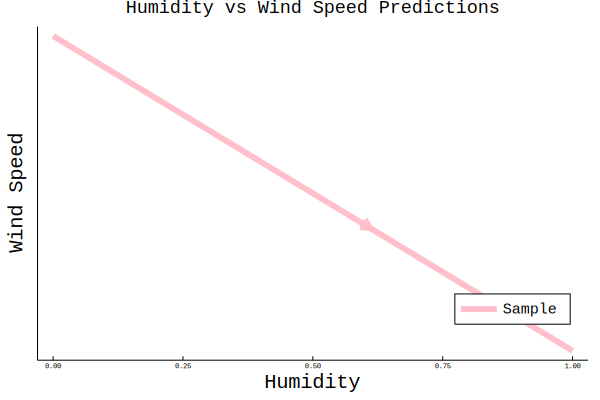

In [28]:
plot(testX,yhat,arrow = true,
    linewidth = 6,
    color = :pink,
    yticks=([0,250000,500000,750000,100000]),
    grid = false,legend=:bottomright,label="Sample",
    title = "Humidity vs Wind Speed Predictions",
    xlabel = "Humidity", ylabel = "Wind Speed",
    fontfamily = :Courier,xtickfontsize=4,ytickfontsize=4,
    ytickfont=:Courier,xtickfont = :Courier,titlefontsize=10
    )

In [33]:
scatter(testX,yhat,
    # title:
    title = "Humidity vs Wind Speed",
    # X label:
    xlabel = "Wind Speed",
    # Y label
    ylabel = "Humidity",
    # Grid:
    grid = false,
    # Legend position
    legend=:bottomright,
    # Color of the marker
    color = :lightblue,
    # Marker stroke width and opacity
    markerstrokewidth = 4,
    markerstrokealpha = .75,
    # Marker stroke color
    markerstrokecolor = :pink,
    # Adjust out y ticks
    yticks = [20,40,50],
    # Our font options
    fontfamily = :Courier,xtickfontsize=7,ytickfontsize=9,
    ytickfont=:Courier,xtickfont = :Courier,titlefontsize=13,
    # We can also add annotations, super easily:
    )

In [34]:
using Lathe.models: Pipeline

In [35]:
# Let's switch features for fun.
x = y
y = :Humidity
pipe = Pipeline([StandardScalar], LinearRegression(StandardScalar(train[x]),train[y]))
 #              ^^^^^^^^^^^^^^^^^ Don't forget []! It's iterable!

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[35]:4
└ @ Core In[35]:4
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[35]:4
└ @ Core In[35]:4


Pipeline(typeof(StandardScalar)[Lathe.preprocess.StandardScalar], LinearRegression(Complex{Float64}[-2.0899471020314166 + 0.0im, 0.0759336993366146 - 0.0im, 0.9628667876796316 - 0.0im, 0.47774868963566103 - 0.0im, 1.0216689813819309 - 0.0im, 0.1592368070815388 - 0.0im, 0.526750517720911 - 0.0im, 2.0605077367892224 - 0.0im, 2.7367329643656655 - 0.0im, 3.393357460708011 - 0.0im  …  0.9530664220625819 - 0.0im, 1.4675856169577017 - 0.0im, 1.2127761109144042 - 0.0im, 1.4332843372980282 - 0.0im, 0.9432660564455326 - 0.0im, 1.0412697126160309 - 0.0im, 0.4287468615504116 - 0.0im, 0.06123315091103994 - 0.0im, -0.21317708636635824 + 0.0im, -0.55128970015458 + 0.0im], [0.89, 0.83, 0.85, 0.95, 0.89, 0.82, 0.72, 0.67, 0.54, 0.55  …  0.37, 0.33, 0.28, 0.28, 0.28, 0.28, 0.32, 0.43, 0.48, 0.56]))

In [36]:
yhat2 = predict(pipe,testX)
# So this error is a big blocker: What this means is that our X's data doesn't have enough variance
#    For a z score scalar, so it begins bringing th

MethodError: MethodError: no method matching +(::Complex{Float64}, ::Array{Complex{Float64},1})
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529
  +(::Complex) at complex.jl:265
  +(::Complex, !Matched::Complex) at complex.jl:267
  ...